# PRJNA811594 - Ramuta et al.

Article link: [https://www.proquest.com/docview/2824635201/abstract/6A91E51BE32C4530PQ/1?sourcetype=Dissertations%20&%20Theses](https://www.proquest.com/docview/2824635201/abstract/6A91E51BE32C4530PQ/1?sourcetype=Dissertations%20&%20Theses).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA811594"
lineages_in_paper <- c("B.1.617.2", "BA.1", "P.1")


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,23230,-23231.1,del:23231:1,0.001,1000,1,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
2,22771,~22772T,aa:S:G404C,0.000,0,0,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
3,22774,~22775A,aa:S:D405N,0.000,0,0,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
4,22785,~22786C,aa:S:R408S,0.000,0,0,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
5,22791,~22792T,C22792T,0.000,0,0,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
6,22808,~22809A,aa:S:G416E,0.000,1000,0,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  3 79

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  0.169   0.002   0.173 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,9.952065e-01,NA,NA,BA.1,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
2,4.250692e-03,NA,NA,P.1,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
3,5.427643e-04,NA,NA,B.1.617.2,SRR18184336,2022-01-25,MNHarden-2022-01-25-RBD,505,505998,PRJNA811594,UMN
4,9.953471e-01,NA,NA,BA.1,SRR18184337,2022-01-17,MNHarden-2022-01-17-RBD,505,505996,PRJNA811594,UMN
5,4.652867e-03,NA,NA,P.1,SRR18184337,2022-01-17,MNHarden-2022-01-17-RBD,505,505996,PRJNA811594,UMN
6,1.135922e-09,NA,NA,B.1.617.2,SRR18184337,2022-01-17,MNHarden-2022-01-17-RBD,505,505996,PRJNA811594,UMN


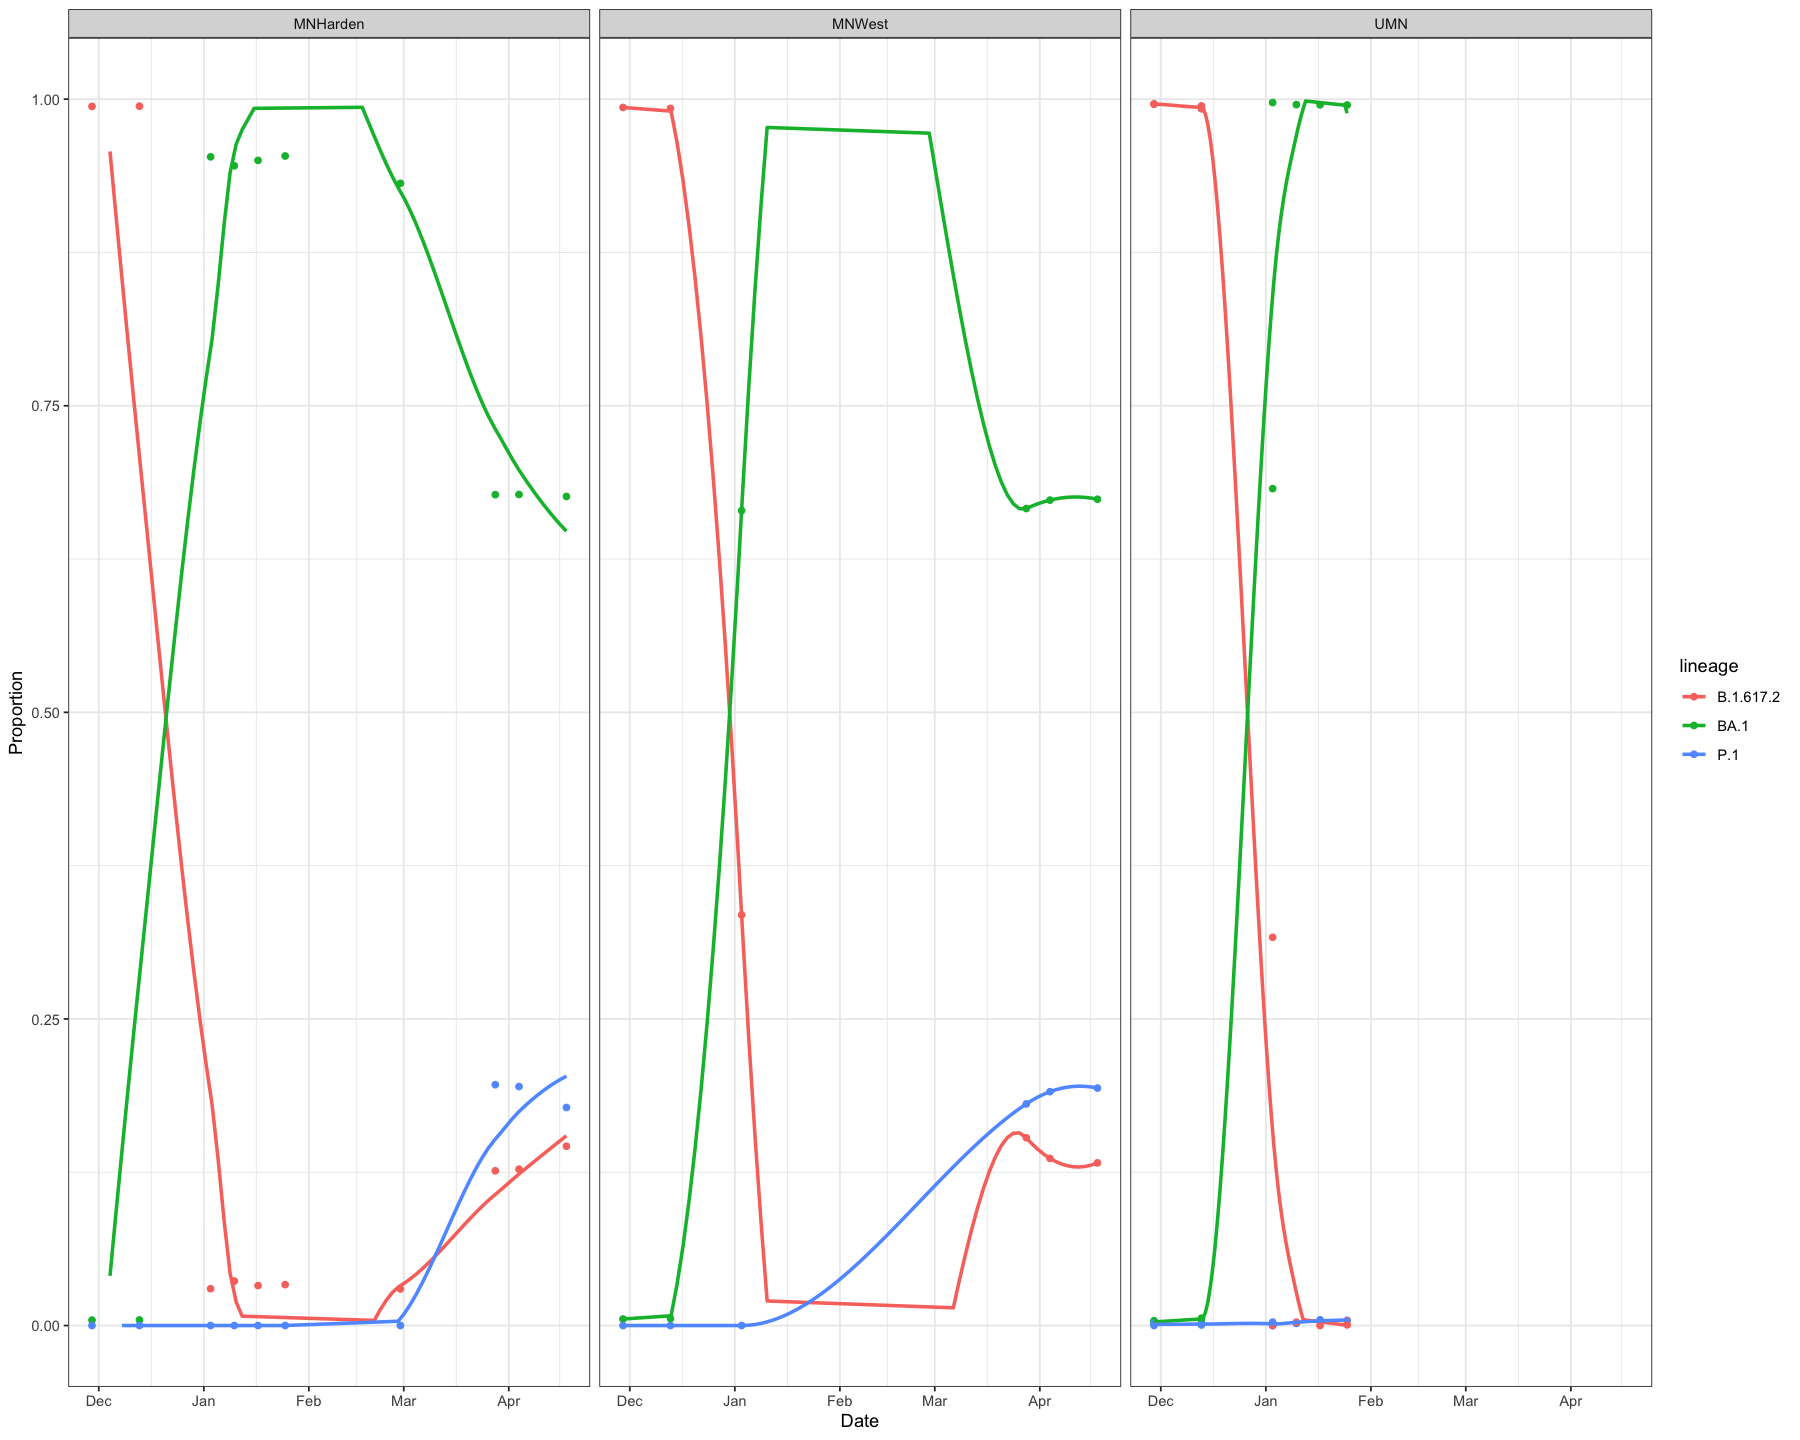

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
